In [1]:
#set dependicies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Total Energy Consumption in the US from 2000 - 2015

In [2]:
#pull in total energy data files.  Need USA totals, so use the 'uncleaned files'
residential_df = pd.read_csv("data_output/Residential_Energy_Consumption.csv")
commercial_df = pd.read_csv("data_output/Commercial_Energy_Consumption.csv")
industrial_df = pd.read_csv("data_output/Industrial_Energy_Consumption.csv")

In [3]:
#set State column as Index
residential_df.set_index("State", inplace = True)
commercial_df.set_index("State", inplace = True)
industrial_df.set_index("State", inplace = True)

In [4]:
#get residential energy consumption from residential
res_US = residential_df.loc[residential_df.index == "USA"]
res_US_T = res_US.T
res_US_T.sort_index(inplace = True,ascending=True)
res_US_T

State,USA
2000,20384790
2001,20026646
2002,20763207
2003,21080842
2004,21042686
2005,21574410
2006,20631559
2007,21489150
2008,21635346
2009,21052360


In [5]:
#get commerical energy consumption from USA
com_US = commercial_df.loc[commercial_df.index == "USA"]
com_US_T = com_US.T
com_US_T.sort_index(inplace = True,ascending=True)
com_US_T

State,USA
2000,17197485
2001,17160380
2002,17367807
2003,17356490
2004,17665125
2005,17840300
2006,17700743
2007,18209675
2008,18350265
2009,17849365


In [6]:
#combine the two dataframes
combined_df = pd.merge(res_US_T, com_US_T, left_index = True, right_index = True)
combined_df

State,USA_x,USA_y
2000,20384790,17197485
2001,20026646,17160380
2002,20763207,17367807
2003,21080842,17356490
2004,21042686,17665125
2005,21574410,17840300
2006,20631559,17700743
2007,21489150,18209675
2008,21635346,18350265
2009,21052360,17849365


In [7]:
#get industrial energy from USA
ind_US = industrial_df.loc[industrial_df.index == "USA"]
ind_US_T = ind_US.T
ind_US_T.sort_index(inplace = True,ascending=True)
ind_US_T

State,USA
2000,34591023
2001,32610905
2002,32598811
2003,32508274
2004,33469433
2005,32422792
2006,32344390
2007,32386212
2008,31335396
2009,28451553


In [8]:
#merge data frames
combined_df = pd.merge(combined_df, ind_US_T, left_index = True, right_index = True)
final_combined_df= combined_df.rename(columns = {'USA_x': 'Total Residential', "USA_y":"Total Commercial", "USA": "Total Industrial"})
final_combined_df


State,Total Residential,Total Commercial,Total Industrial
2000,20384790,17197485,34591023
2001,20026646,17160380,32610905
2002,20763207,17367807,32598811
2003,21080842,17356490,32508274
2004,21042686,17665125,33469433
2005,21574410,17840300,32422792
2006,20631559,17700743,32344390
2007,21489150,18209675,32386212
2008,21635346,18350265,31335396
2009,21052360,17849365,28451553


In [9]:
#sum up the individual sectors to get total consumption
final_combined_df["Total Consumption"] = final_combined_df["Total Residential"] + final_combined_df["Total Commercial"] + final_combined_df["Total Industrial"]

final_combined_df

State,Total Residential,Total Commercial,Total Industrial,Total Consumption
2000,20384790,17197485,34591023,72173298
2001,20026646,17160380,32610905,69797931
2002,20763207,17367807,32598811,70729825
2003,21080842,17356490,32508274,70945606
2004,21042686,17665125,33469433,72177244
2005,21574410,17840300,32422792,71837502
2006,20631559,17700743,32344390,70676692
2007,21489150,18209675,32386212,72085037
2008,21635346,18350265,31335396,71321007
2009,21052360,17849365,28451553,67353278


In [10]:
final_combined_df.describe()

State,Total Residential,Total Commercial,Total Industrial,Total Consumption
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,2.098365e+07,1.776328e+07,3.188570e+07,7.063263e+07
std,5.816754e+05,3.797522e+05,1.353438e+06,1.343874e+06
min,1.982862e+07,1.716038e+07,2.845155e+07,6.735328e+07
25%,2.062032e+07,1.736646e+07,3.126416e+07,7.022139e+07
50%,2.104752e+07,1.784483e+07,3.205686e+07,7.070326e+07
75%,2.143589e+07,1.803985e+07,3.253091e+07,7.150575e+07
max,2.186032e+07,1.835026e+07,3.459102e+07,7.217724e+07


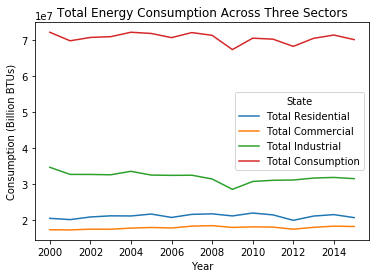

In [11]:
final_combined_df.plot(kind = "line", title = "Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("images/Fig1.png")
plt.show()

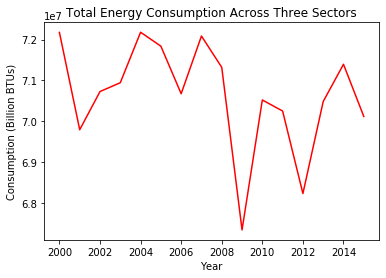

In [12]:
total_consumption = final_combined_df["Total Consumption"]

total_consumption.plot(kind="line", title ="Total Energy Consumption Across Three Sectors", color = 'r')
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("images/Fig2.png")
plt.show()

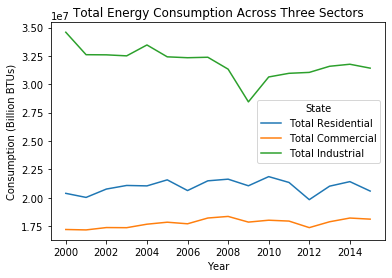

In [13]:
sectors_combined_df = final_combined_df.drop(columns = ['Total Consumption'])
sectors_combined_df.plot(kind="line", title ="Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("images/Fig4.png")
plt.show()

In [14]:
sectors_combined_df["Total Residential"] /= 1000000
sectors_combined_df["Total Commercial"] /= 1000000
sectors_combined_df["Total Industrial"] /= 1000000
sectors_combined_df

State,Total Residential,Total Commercial,Total Industrial
2000,20.384790,17.197485,34.591023
2001,20.026646,17.160380,32.610905
2002,20.763207,17.367807,32.598811
2003,21.080842,17.356490,32.508274
2004,21.042686,17.665125,33.469433
2005,21.574410,17.840300,32.422792
2006,20.631559,17.700743,32.344390
2007,21.489150,18.209675,32.386212
2008,21.635346,18.350265,31.335396
2009,21.052360,17.849365,28.451553


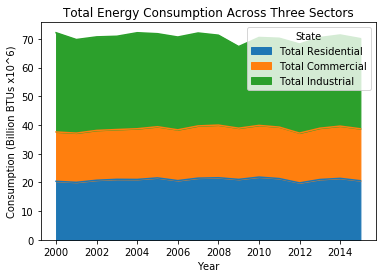

In [15]:
sectors_combined_df.plot(kind = "area", title = "Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs x10^6)")
plt.savefig("images/tot_energy_area.png")
plt.show()

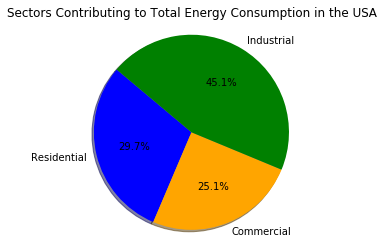

In [16]:
#pie chart
residential_sum = final_combined_df["Total Residential"].sum()
commercial_sum =final_combined_df["Total Commercial"].sum()
industrial_sum = final_combined_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [residential_sum, commercial_sum, industrial_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to Total Energy Consumption in the USA")
plt.axis("equal")
plt.savefig("images/Fig5.png")
plt.show()

# C02 Emissions

In [17]:
#get data from csv files
co2_residential_df = pd.read_csv("data_output/residential_c02.csv")
co2_commercial_df = pd.read_csv("data_output/commercial_c02.csv")
co2_industrial_df = pd.read_csv("data_output/industrial_c02.csv")


In [18]:
co2_commercial_df.dtypes

States     object
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
dtype: object

In [19]:
#set 'States' as index
co2_residential_df.set_index("States", inplace = True)
co2_commercial_df.set_index("States", inplace = True)
co2_industrial_df.set_index("States", inplace = True)

#sum values over each year column
sum_co2_residential = co2_residential_df.sum(axis=0)
sum_co2_commercial = co2_commercial_df.sum(axis=0)
sum_co2_industrial = co2_industrial_df.sum(axis=0)

In [20]:
years = list(co2_residential_df.columns)
combined_em_df = pd.DataFrame({"Total Residential": sum_co2_residential,
                           "Total Commercial": sum_co2_commercial,
                           "Total Industrial": sum_co2_industrial})
combined_em_df["Total Emissions"] = combined_em_df["Total Residential"] + combined_em_df["Total Commercial"] + combined_em_df["Total Industrial"]
combined_em_df.dropna(inplace = True)
combined_em_df.dtypes

Total Residential    float64
Total Commercial     float64
Total Industrial     float64
Total Emissions      float64
dtype: object

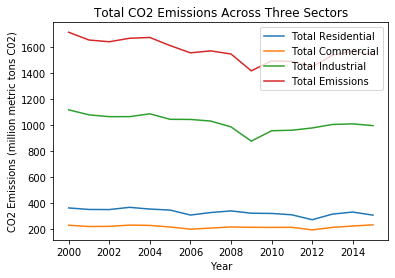

In [21]:
combined_em_df.plot(kind = "line", title = "Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("images/Fig6.png")
plt.show()

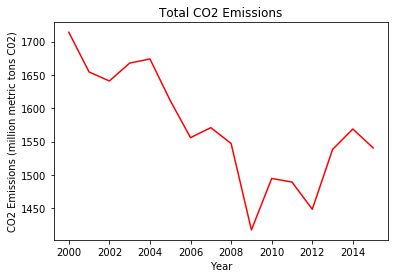

In [22]:
total_emissions = combined_em_df["Total Emissions"]

total_emissions.plot(kind="line", title ="Total CO2 Emissions", color = 'r')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("images/Fig7.png")
plt.show()

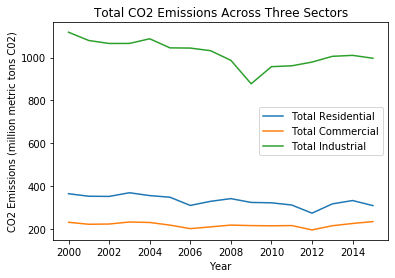

In [23]:
em_sectors_combined_df = combined_em_df.drop(columns = ['Total Emissions'])
em_sectors_combined_df.plot(kind="line", title ="Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("images/Fig8.png")
plt.show()

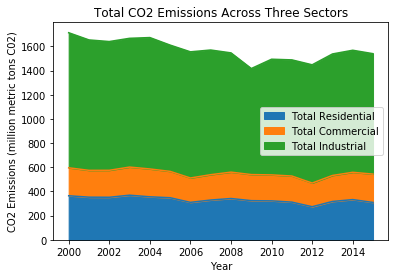

In [24]:
em_sectors_combined_df = combined_em_df.drop(columns = ['Total Emissions'])
em_sectors_combined_df.plot(kind="area", title ="Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("images/Fig9.png")
plt.show()

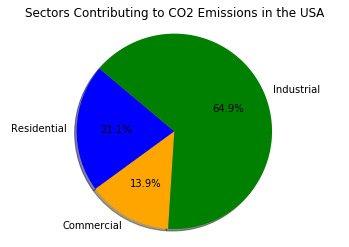

In [25]:
#pie chart
em_residential_sum = combined_em_df["Total Residential"].sum()
em_commercial_sum =combined_em_df["Total Commercial"].sum()
em_industrial_sum = combined_em_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [em_residential_sum, em_commercial_sum, em_industrial_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to CO2 Emissions in the USA")
plt.axis("equal")
plt.savefig("images/Fig10.png")
plt.show()

# Total Energy Consumption and CO2 emission relationships

In [26]:
#create df for scatter plot
total_energy_co2_df = pd.DataFrame({"Total Consumption": total_consumption, "Total Emissions": total_emissions})




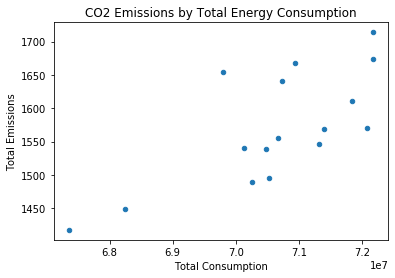

In [27]:
total_energy_co2_df.plot(kind = "scatter", x="Total Consumption", y="Total Emissions", title = "CO2 Emissions by Total Energy Consumption")
plt.show()

In [28]:
#import lineregress
from scipy.stats import linregress 

The r-squared is: 0.52
The actual slope is: 4.549502069515389e-05


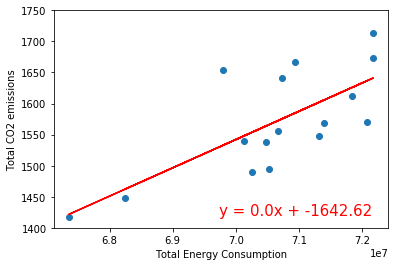

In [29]:
x_values = total_energy_co2_df['Total Consumption']
y_values = total_energy_co2_df['Total Emissions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") #red solid line
plt.annotate(line_eq,(69729825,1420),fontsize=15,color="red")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.ylim(1400, 1750)
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The actual slope is: {slope}")
plt.savefig("images/Fig11.png")
plt.show()

The r-squared is: 0.52


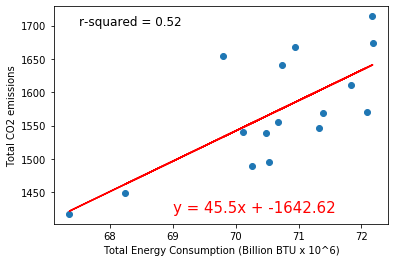

In [56]:
x_values = total_energy_co2_df['Total Consumption']/1000000
y_values = total_energy_co2_df['Total Emissions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") #red solid line
plt.annotate(line_eq,(69,1420),fontsize=15,color="red")
plt.xlabel('Total Energy Consumption (Billion BTU x 10^6)')
plt.ylabel('Total CO2 emissions')
rsquare = round(rvalue**2,2)
plt.annotate(f"r-squared = {rsquare}", (67.5,1700), fontsize=12)
#plt.ylim(1400, 1750)
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.savefig("images/totenergy_co2_regress.png")
plt.show()

# Solar Energy Consumption

In [30]:
#pull in solar energy data files.  Need USA totals, so use the 'uncleaned files'
residential_solar_df = pd.read_csv("data_output/residential_solar_data.csv")
commercial_solar_df = pd.read_csv("data_output/commercial_solar_data.csv")
industrial_solar_df = pd.read_csv("data_output/industrial_solar_data.csv")

In [31]:
#set State column as Index
residential_solar_df.set_index("State", inplace = True)
commercial_solar_df.set_index("State", inplace = True)
industrial_solar_df.set_index("State", inplace = True)

In [32]:

res_solar_US = residential_solar_df.loc[residential_solar_df.index == "USA"]
res_solar_US_T = res_solar_US.T
res_solar_US_T.sort_index(inplace = True,ascending=True)
res_solar_US_T

State,USA
2000,57707
2001,55172
2002,53293
2003,51813
2004,51130
2005,50167
2006,52501
2007,55046
2008,58436
2009,59822


In [33]:
#get commerical energy consumption from USA
com_solar_US = commercial_solar_df.loc[commercial_solar_df.index == "USA"]
com_solar_US_T = com_solar_US.T
com_solar_US_T.sort_index(inplace = True,ascending=True)
com_solar_US_T

State,USA
2000,597
2001,732
2002,854
2003,992
2004,1216
2005,1821
2006,2635
2007,3707
2008,5940
2009,7907


In [34]:
#get industrial energy from USA
ind_solar_US = industrial_solar_df.loc[industrial_solar_df.index == "USA"]
ind_solar_US_T = ind_solar_US.T
ind_solar_US_T.sort_index(inplace = True,ascending=True)
ind_solar_US_T

State,USA
2000,132
2001,162
2002,189
2003,220
2004,269
2005,403
2006,583
2007,821
2008,1315
2009,1751


In [35]:
#combine the two dataframes
combined_solar_df = pd.merge(res_solar_US_T, com_solar_US_T, left_index = True, right_index = True)
combined_solar_df

State,USA_x,USA_y
2000,57707,597
2001,55172,732
2002,53293,854
2003,51813,992
2004,51130,1216
2005,50167,1821
2006,52501,2635
2007,55046,3707
2008,58436,5940
2009,59822,7907


In [36]:
#merge data frames
combined_solar_df = pd.merge(combined_solar_df, ind_solar_US_T, left_index = True, right_index = True)
final_combined_solar_df= combined_solar_df.rename(columns = {'USA_x': 'Total Residential', "USA_y":"Total Commercial", "USA": "Total Industrial"})
final_combined_solar_df.drop(["2016","2017","2018"], inplace = True)
final_combined_solar_df

State,Total Residential,Total Commercial,Total Industrial
2000,57707,597,132
2001,55172,732,162
2002,53293,854,189
2003,51813,992,220
2004,51130,1216,269
2005,50167,1821,403
2006,52501,2635,583
2007,55046,3707,821
2008,58436,5940,1315
2009,59822,7907,1751


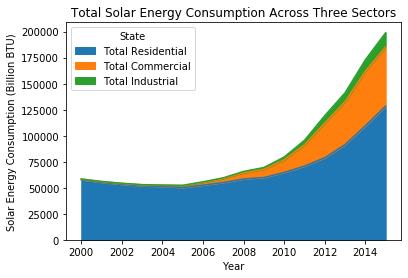

In [37]:
final_combined_solar_df.plot(kind="area", title ="Total Solar Energy Consumption Across Three Sectors",)
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("images/solar_area.png", bbox_inches = "tight")

plt.show()

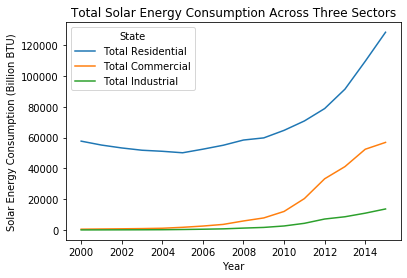

In [38]:
final_combined_solar_df.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("images/Fig13.png")
plt.show()

In [39]:
#sum up the individual sectors to get total consumption
total_combined_solar_df = final_combined_solar_df.copy()
total_combined_solar_df["Total Consumption"] = total_combined_solar_df["Total Residential"] + total_combined_solar_df["Total Commercial"] + total_combined_solar_df["Total Industrial"]
total_combined_solar_df

State,Total Residential,Total Commercial,Total Industrial,Total Consumption
2000,57707,597,132,58436
2001,55172,732,162,56066
2002,53293,854,189,54336
2003,51813,992,220,53025
2004,51130,1216,269,52615
2005,50167,1821,403,52391
2006,52501,2635,583,55719
2007,55046,3707,821,59574
2008,58436,5940,1315,65691
2009,59822,7907,1751,69480


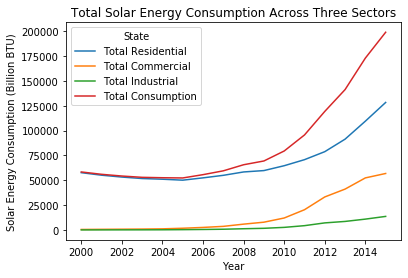

In [40]:
total_combined_solar_df.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("images/Fig14.png")
plt.show()

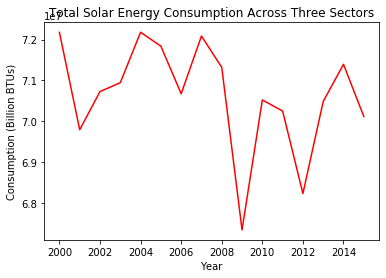

In [41]:
total_solar_consumption = total_combined_solar_df["Total Consumption"]

total_consumption.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors", color = 'r')
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("images/Fig15.png")
plt.show()

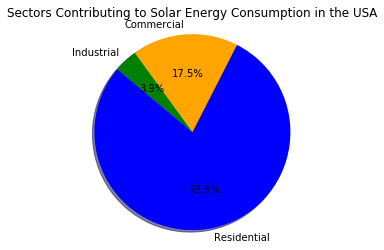

In [42]:
#pie chart
residential_solar_sum = final_combined_solar_df["Total Residential"].sum()
commercial_solar_sum =final_combined_solar_df["Total Commercial"].sum()
industrial_solar_sum = final_combined_solar_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [residential_solar_sum, commercial_solar_sum, industrial_solar_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to Solar Energy Consumption in the USA")
plt.axis("equal")
plt.savefig("images/Fig16.png")
plt.show()

# Solar Energy Consumption Across the 50 States

In [43]:
st_residential_solar_df = pd.read_csv("data_output/cleaned_solar_residential.csv")
st_commercial_solar_df = pd.read_csv("data_output/cleaned_solar_commercial.csv")
st_industrial_solar_df = pd.read_csv("data_output/cleaned_solar_industrial.csv")

In [44]:
#st_residential_solar_df.set_index("State", inplace = True)

st_residential_solar_df
list(st_residential_solar_df.columns)
cleaned_st_residential_solar_df = st_residential_solar_df.drop(columns = ["Unnamed: 0"])
cleaned_st_residential_solar_df

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AK,3,3,3,3,3,3,3,2,0,0,0,0,0,0,0,0
1,USA-AL,76,75,73,69,67,65,62,64,63,62,53,54,68,82,97,113
2,USA-AR,92,87,85,81,71,69,59,53,53,94,90,239,367,500,642,795
3,USA-AZ,9971,8315,6709,5396,4353,3702,3116,2872,2628,2506,2425,2620,2748,2866,3076,3340
4,USA-CA,50656,41308,32066,26313,23338,20837,18864,18272,16999,15962,14979,15317,15490,15949,16646,17460
5,USA-CO,2238,1963,1457,1105,891,726,523,398,276,226,202,191,197,203,210,219
6,USA-CT,1857,1422,1163,1040,982,928,875,816,744,649,552,452,400,363,301,259
7,USA-DE,240,188,151,121,93,76,50,28,20,4,4,7,10,12,15,18
8,USA-FL,27386,26894,26004,25248,24476,23732,23110,23598,23150,22984,22915,23956,24706,25656,26769,27909
9,USA-GA,381,361,339,323,308,293,281,258,245,241,237,234,236,231,226,224


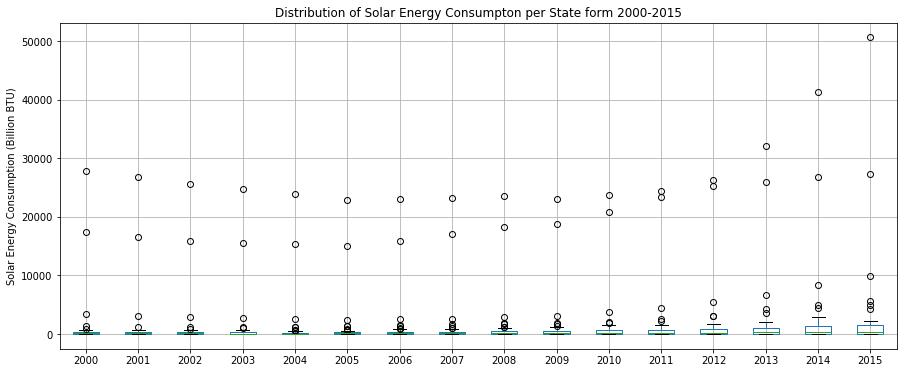

In [45]:
#focus on residential since it makes up ~80% of the consumption
df=cleaned_st_residential_solar_df[["2000","2001", "2002","2003","2004","2005", "2006","2007","2008", "2009","2010",
                                 "2011","2012", "2013","2014","2015"]]
boxplot = df.boxplot(figsize=[15.0, 6.0])

plt.title("Distribution of Solar Energy Consumpton per State form 2000-2015")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("images/Fig17.png")
plt.show()


In [46]:
df["2015"].sort_values(ascending = False)
#three highest states = CA, FL, AZ
#three lowest states = AK, SD, ND

4     50656
8     27386
3      9971
10     5585
30     4887
33     4285
18     2264
5      2238
32     1959
6      1857
36     1792
42     1755
37     1593
17     1465
19     1445
13     1301
31      842
44      678
21      586
23      578
46      549
26      443
45      423
34      402
43      394
9       381
47      334
22      306
20      265
7       240
29      217
14      198
11      162
2        92
16       90
39       85
48       82
1        76
38       64
25       61
12       57
15       51
35       50
28       37
41       29
49       16
24       16
27        7
40        6
0         3
Name: 2015, dtype: int64

In [47]:
df["2015"].median()
#three states around median are: 43 (UT),9(GA),45(VT)

387.5